In [248]:
#Imports

#Data_Manipulation
import numpy as np
import pandas as pd
import seaborn as sns

# Data_Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Classifying
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Clustering
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Others
from subprocess import check_output

In [249]:
if ('SAP' not in check_output(['ls', '../../Data']).decode('utf8')):
    raise FileNotFoundError

In [250]:
df_normal = pd.read_csv('../../Data/SAP_normal.csv')
df_normal.iloc[:,1:].head()

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_normal.iloc[:, 1:])

explained_variance_ratio = pca.explained_variance_ratio_ 
cum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
lst = []
for i in range (0, len(explained_variance_ratio)):
  lst.append([i+1, round(explained_variance_ratio[i],6), cum_explained_variance_ratio[i]])

pca_predictor = pd.DataFrame(lst)
pca_predictor.columns = ['Component', 'Explained Variance', 'Cumulative Explained Variance']
pca_predictor

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.252565,0.252565
1,2,0.116844,0.369409
2,3,0.110032,0.479441
3,4,0.086880,0.566321
4,5,0.071549,0.637871
5,6,0.060843,0.698714
6,7,0.060061,0.758774
7,8,0.048387,0.807162
8,9,0.037112,0.844273
9,10,0.036350,0.880623


In [251]:
df = pd.read_csv('../../Data/SAP.csv')
df.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality','raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},inplace=True)

df["Class"][df["Class"] == "L"] = 0
df["Class"][df["Class"] == "M"] = 1
df["Class"][df["Class"] == "H"] = 2
df['Class'] = df['Class'].astype(int)

df['Gender'][df['Gender'] == "F"] = 0
df['Gender'][df['Gender'] == "M"] = 1
df['Gender'] = df['Gender'].astype(int)

df['Relation'][df['Relation'] == "Father"] = 0
df['Relation'][df['Relation'] == "Mum"] = 1
df['Relation'] = df['Relation'].astype(int)

df['StudentAbsenceDays'][df['StudentAbsenceDays'] == "Under-7"] = 0
df['StudentAbsenceDays'][df['StudentAbsenceDays'] == "Above-7"] = 1
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].astype(int)

df['ParentschoolSatisfaction'][df['ParentschoolSatisfaction'] == "Bad"] = 0
df['ParentschoolSatisfaction'][df['ParentschoolSatisfaction'] == "Good"] = 1
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].astype(int)

df['ParentAnsweringSurvey'][df['ParentAnsweringSurvey'] == "No"] = 0
df['ParentAnsweringSurvey'][df['ParentAnsweringSurvey'] == "Yes"] = 1
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].astype(int)

/home/mohammad/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/mohammad/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/mohammad/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mohammad/venv/lib/python3.6/site-pac

In [252]:
df.head()

,Gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,15,16,2,20,1,1,0,1
1,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,20,20,3,25,1,1,0,1
2,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,10,7,0,30,0,0,1,0
3,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,30,25,5,35,0,0,1,0
4,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,0,40,50,12,50,0,0,1,1


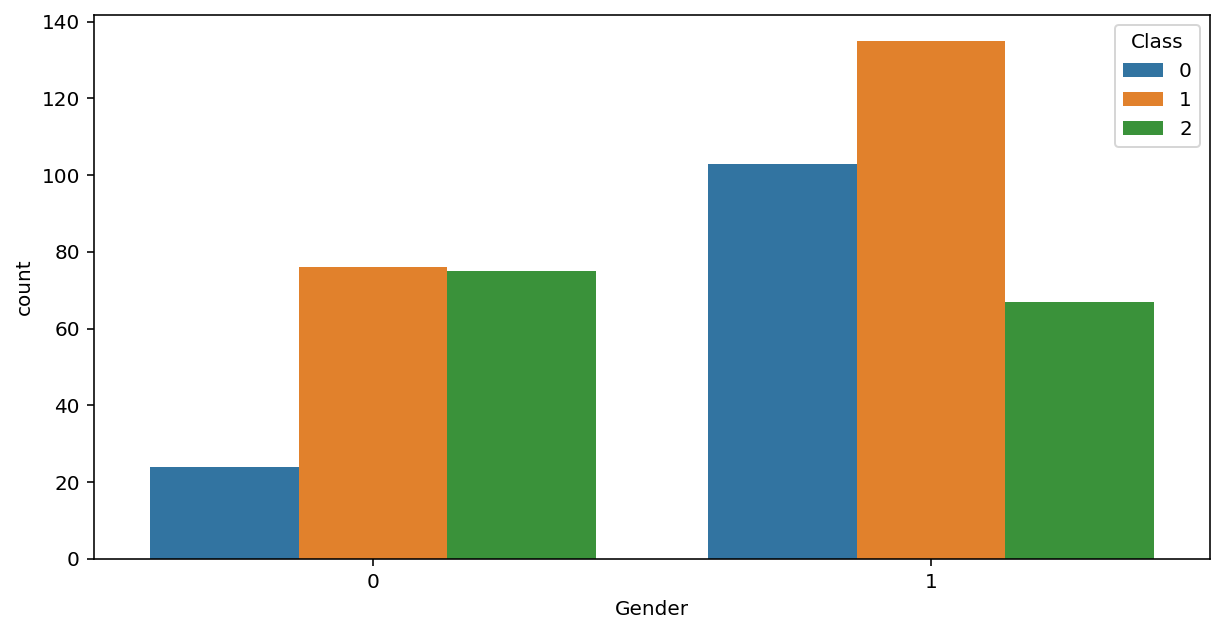

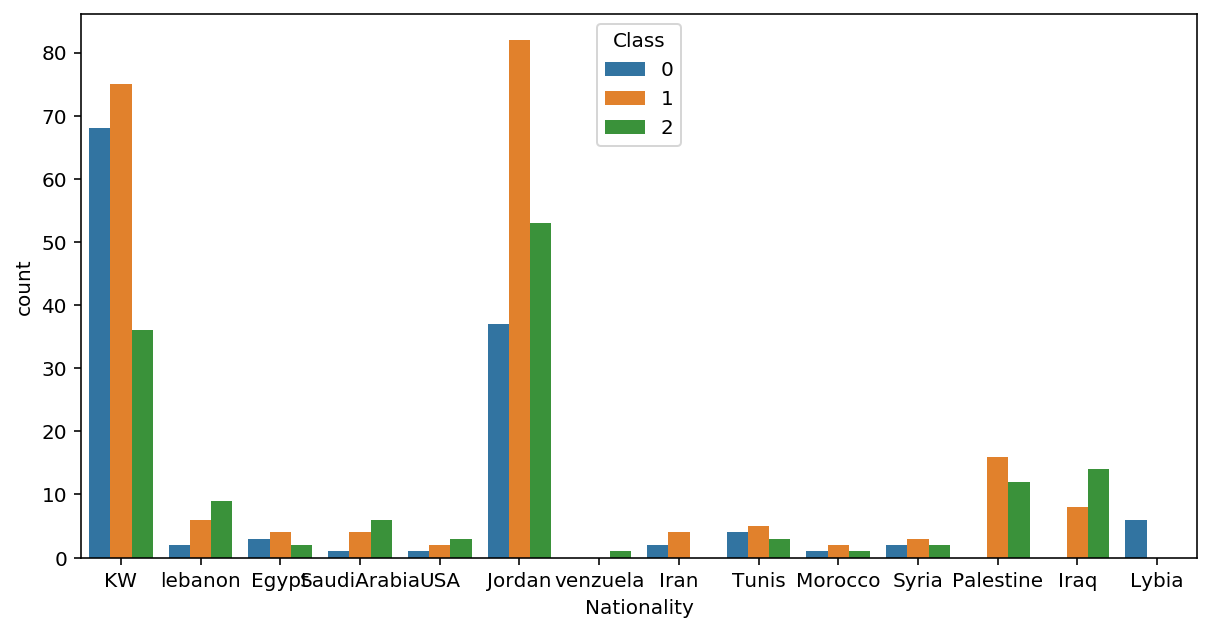

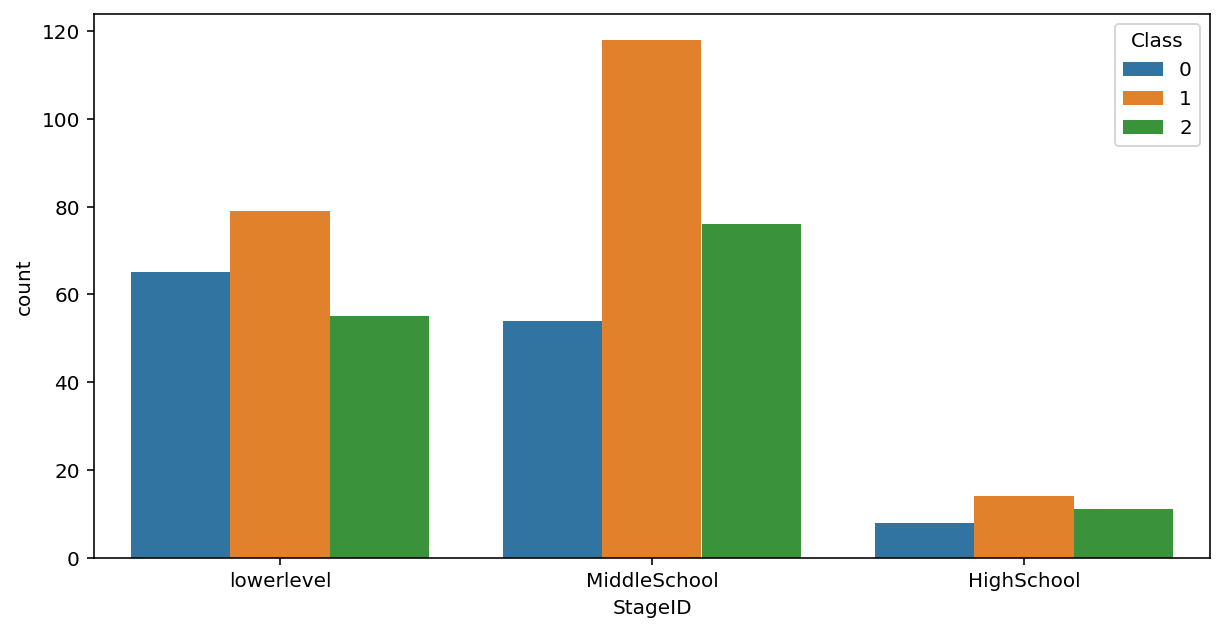

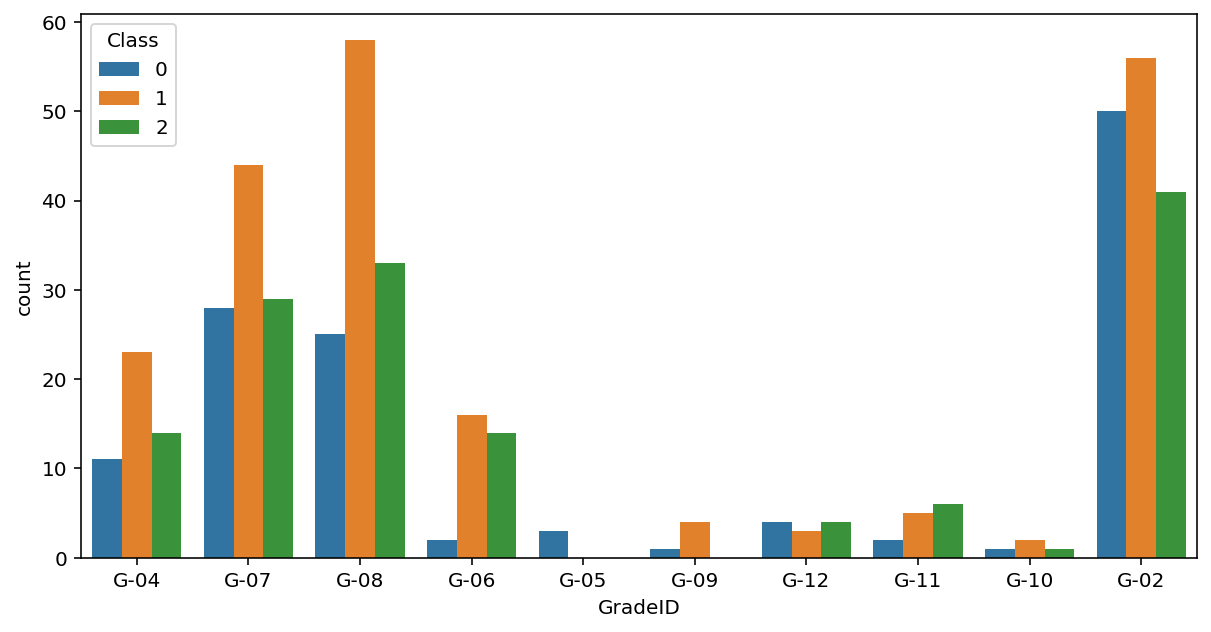

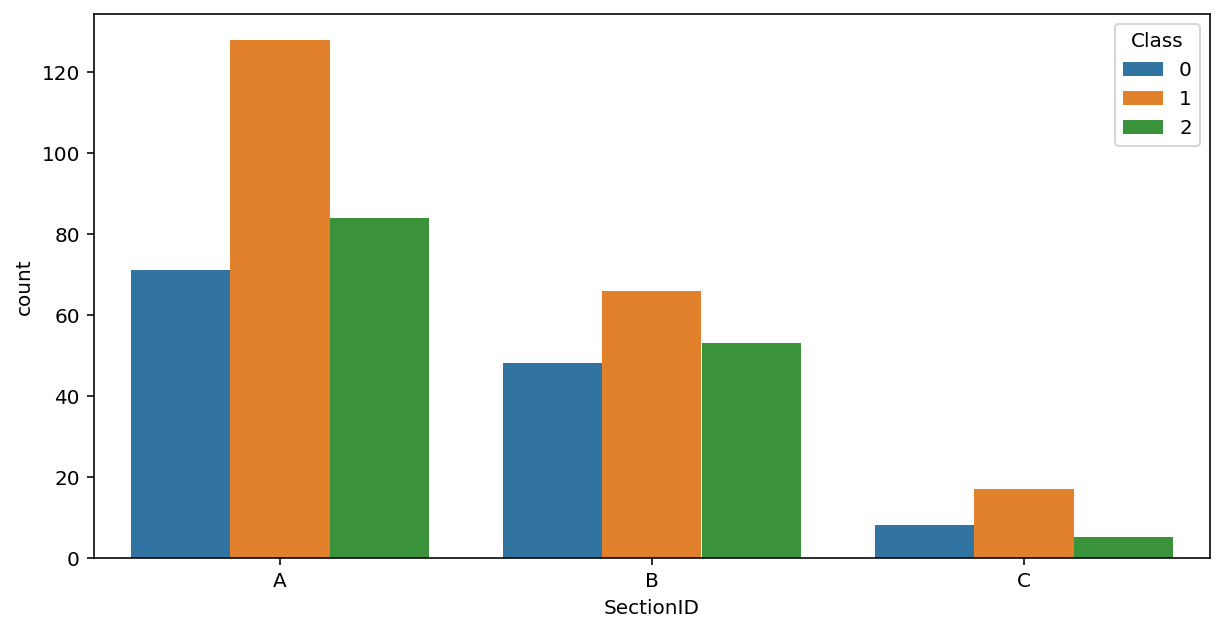

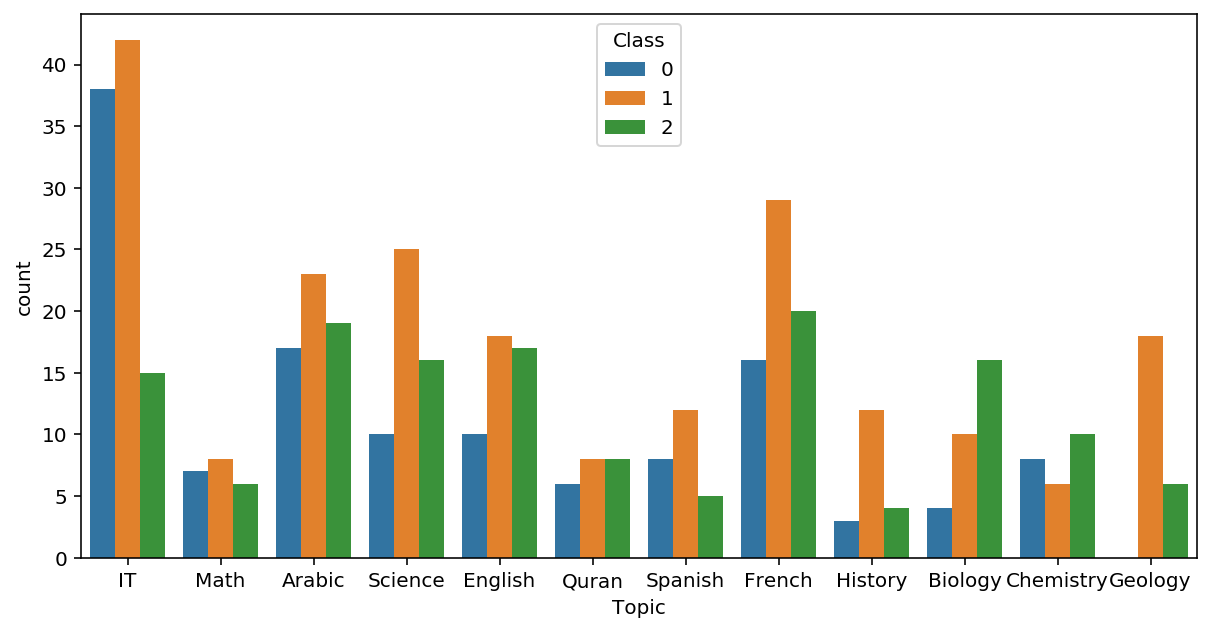

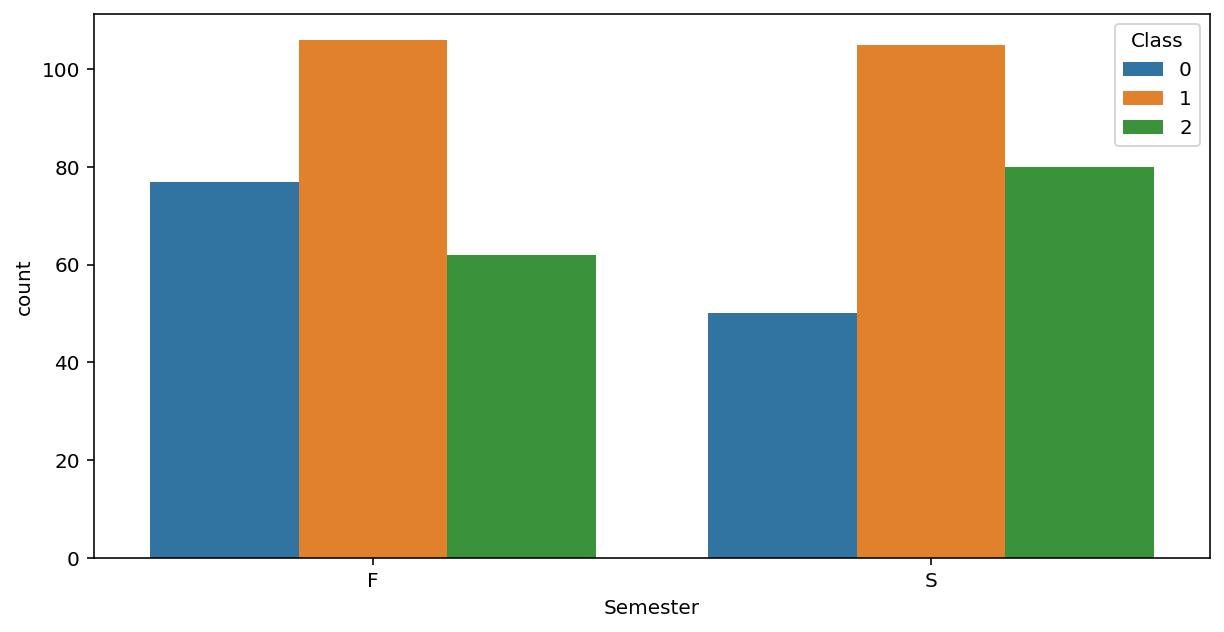

In [253]:
for col in df.loc[:, ['Gender', 'Nationality', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester']].columns:
    plt.figure(figsize = (10,5))
    ax = sns.countplot(x=df[col], hue=df.Class)
    plt.show()

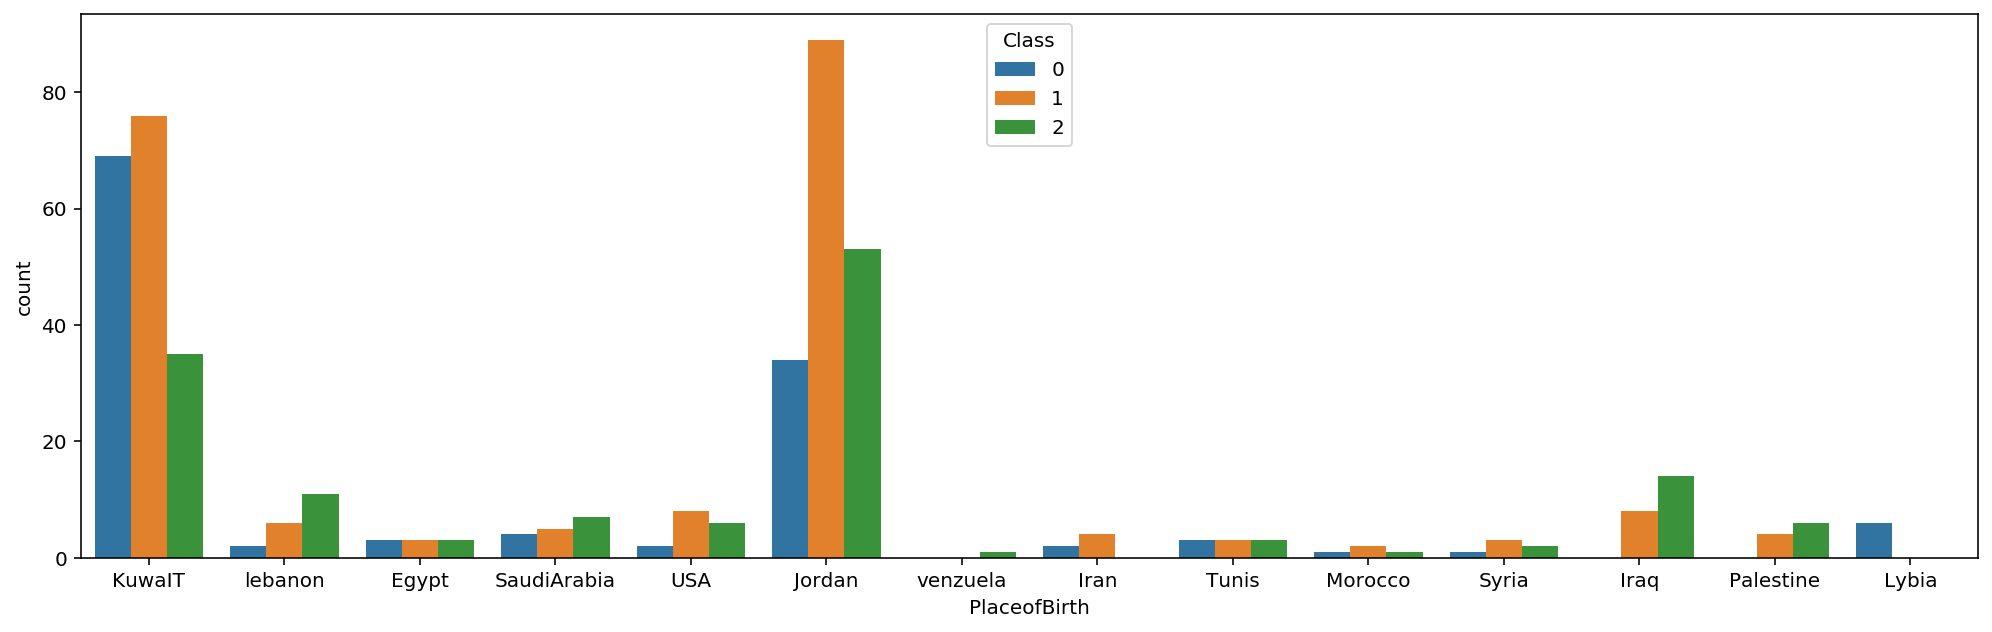

In [254]:
plt.figure(figsize = (17,5))
sns.countplot(df.PlaceofBirth, hue=df.Class)

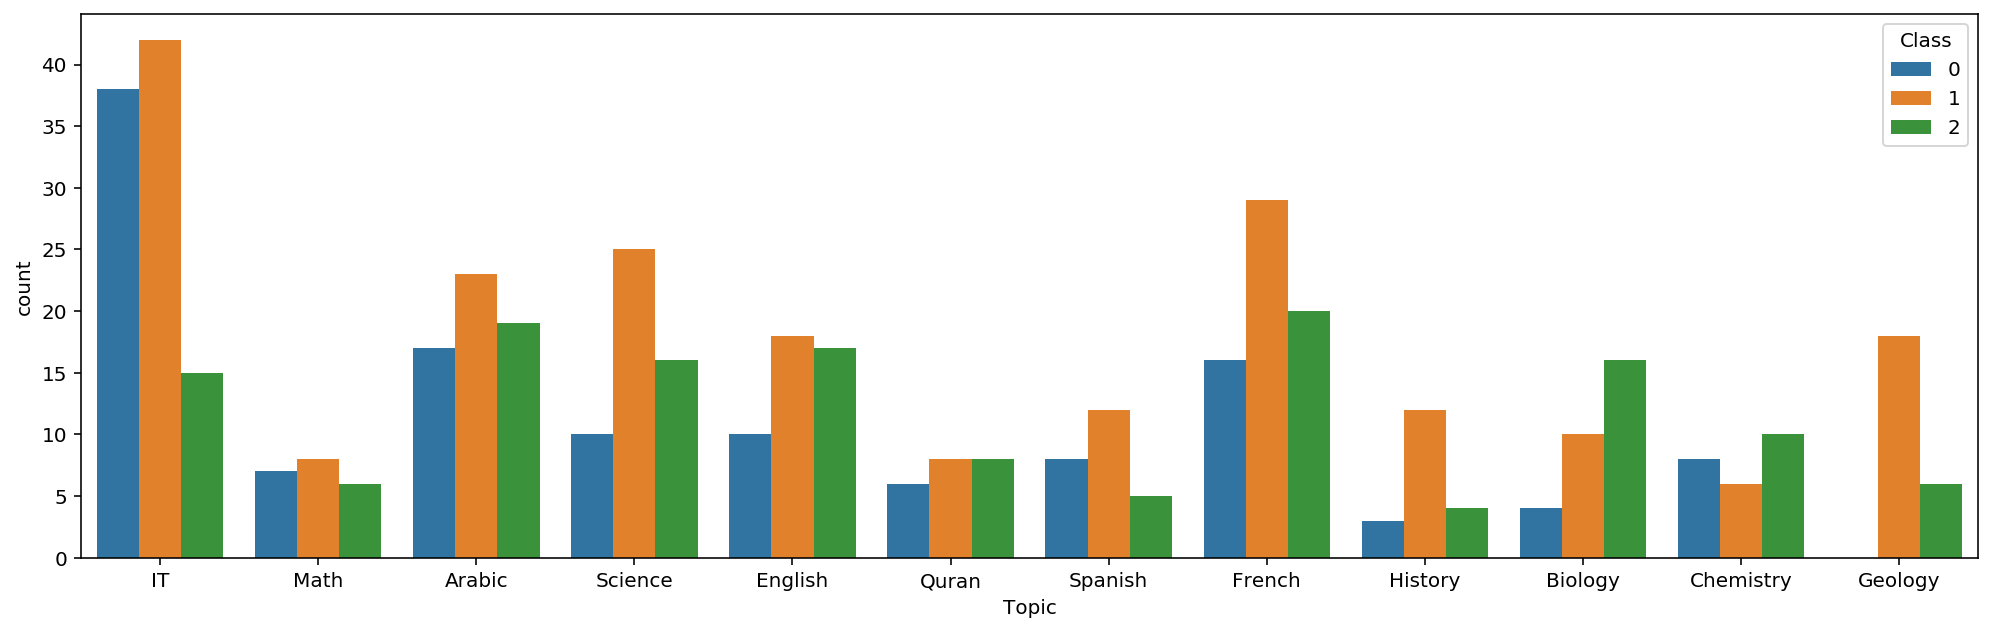

In [255]:
plt.figure(figsize = (17,5))
sns.countplot(df.Topic, hue=df.Class)

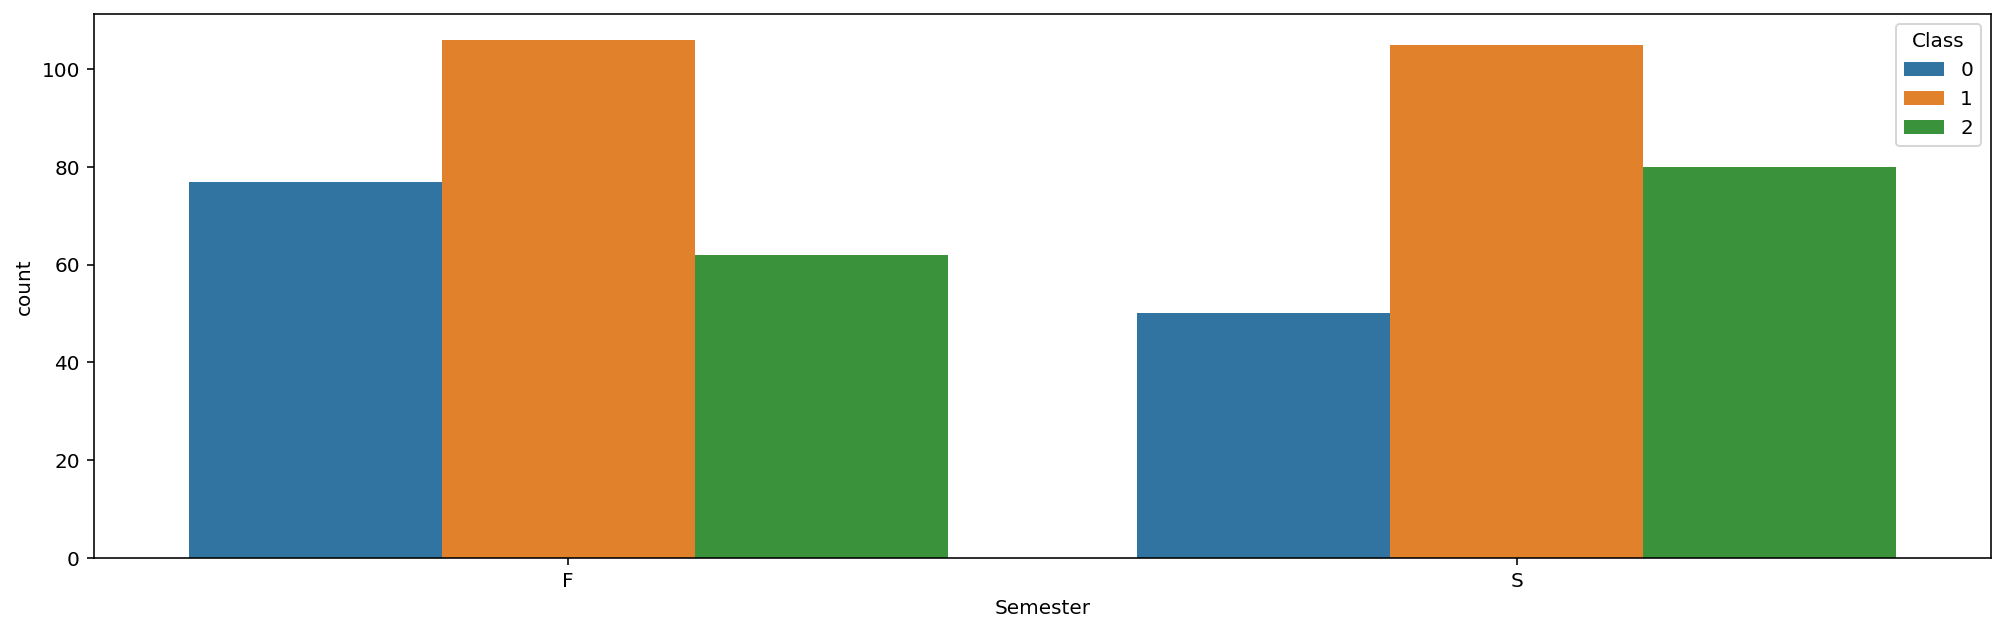

In [256]:
plt.figure(figsize = (17,5))
sns.countplot(df.Semester, hue=df.Class)

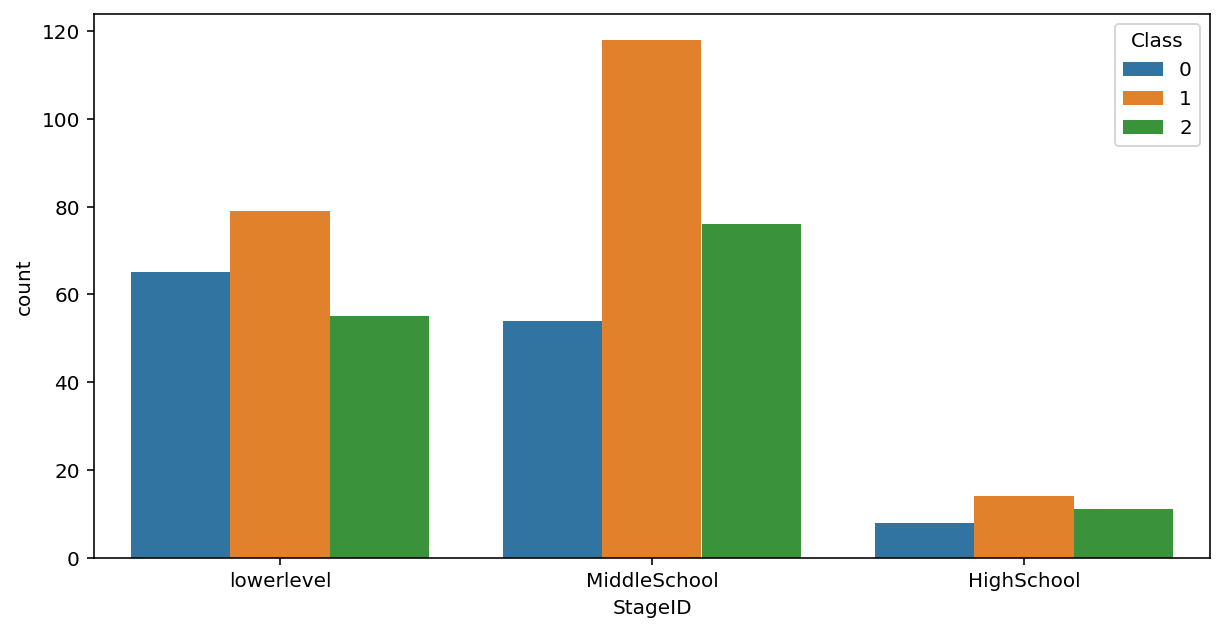

In [257]:
plt.figure(figsize = (10,5))
sns.countplot(df.StageID, hue=df.Class)

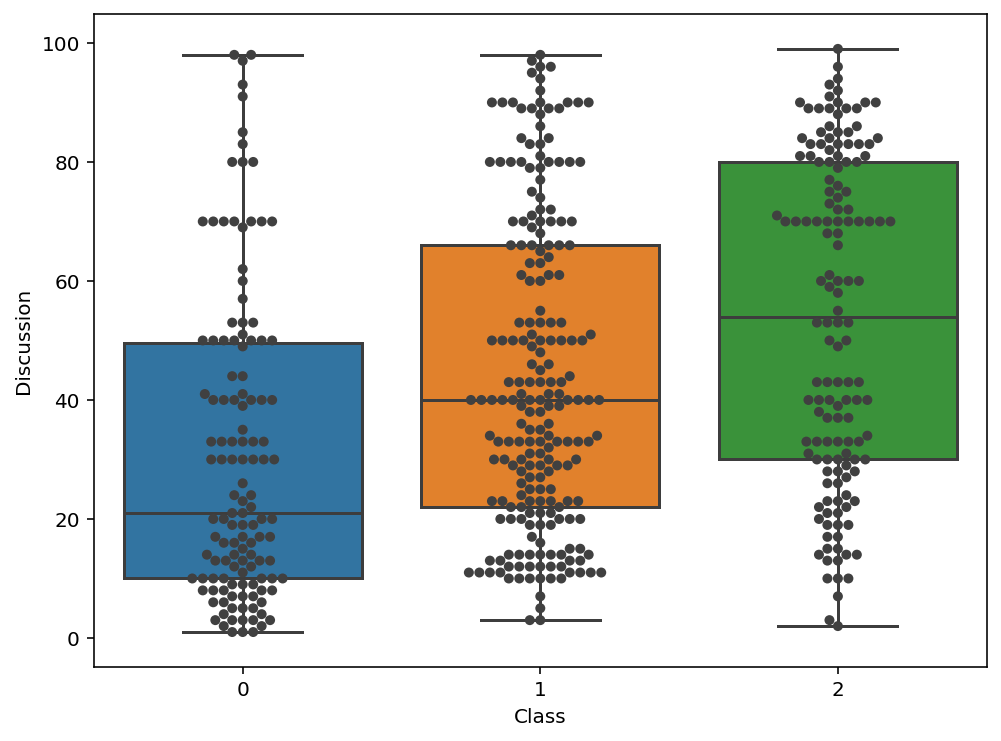

In [258]:
plt.figure(figsize = (8,6))
ax = sns.boxplot(x='Class', y='Discussion', data=df)
ax = sns.swarmplot(x='Class', y = 'Discussion', data=df, color='.25')
plt.show()

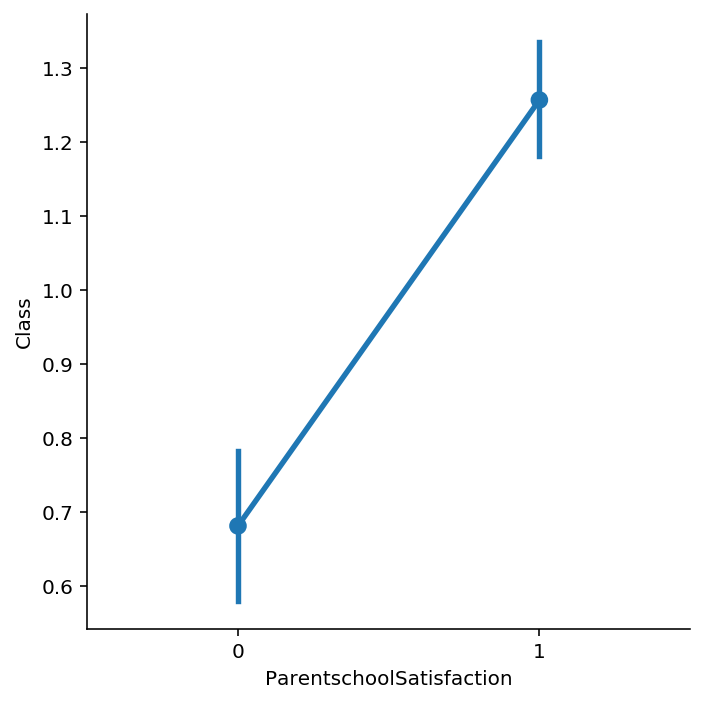

In [259]:
sns.catplot('ParentschoolSatisfaction','Class', kind='point', data=df) 

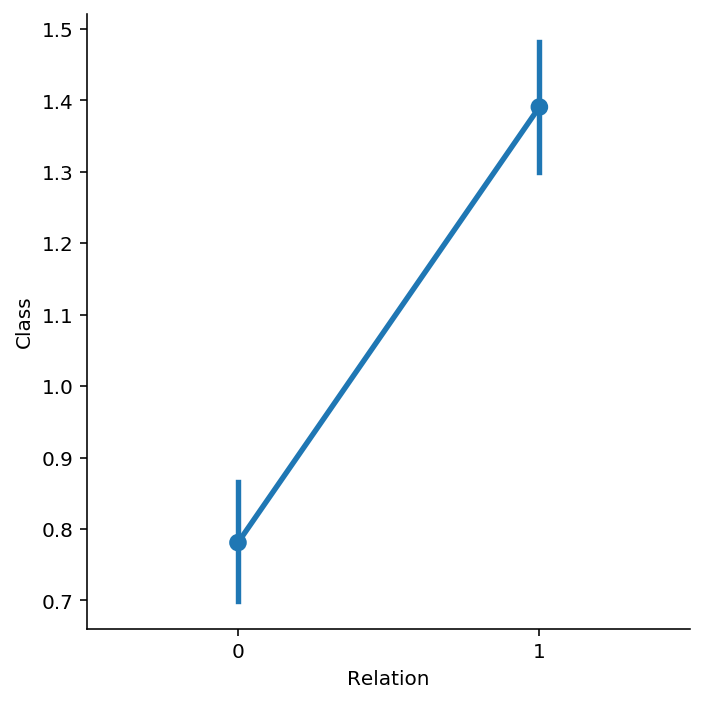

In [260]:
sns.catplot('Relation','Class', kind='point', data=df) 

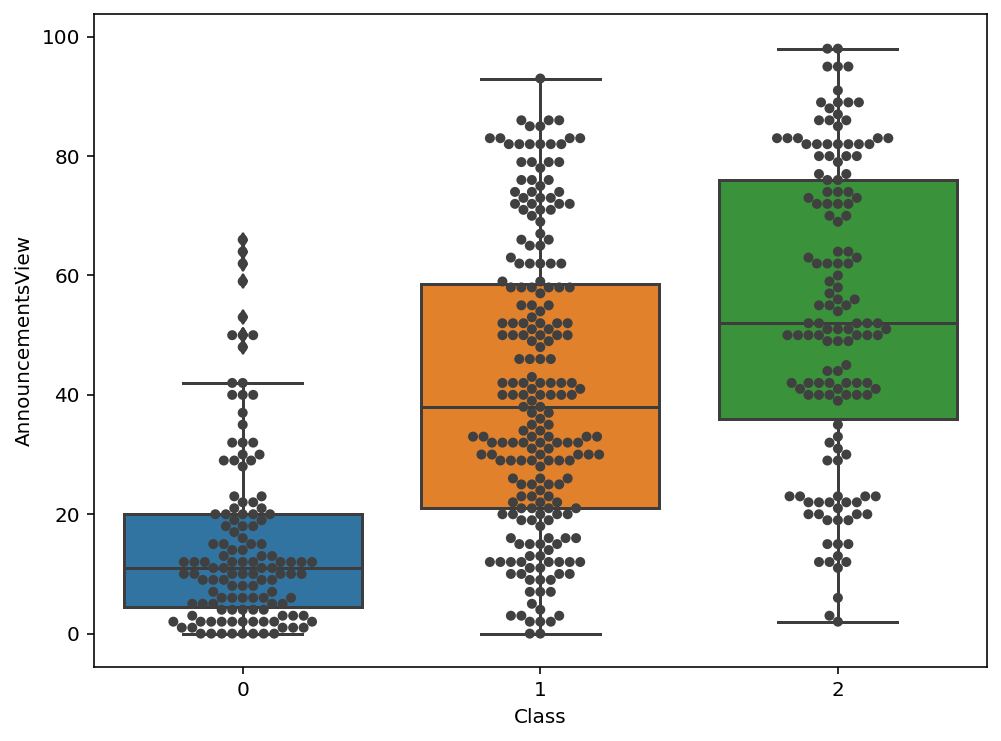

In [261]:
plt.figure(figsize = (8,6))
ax = sns.swarmplot(x='Class', y='AnnouncementsView', data=df, color='.25')
ax = sns.boxplot(x='Class', y='AnnouncementsView', data=df)
plt.show()

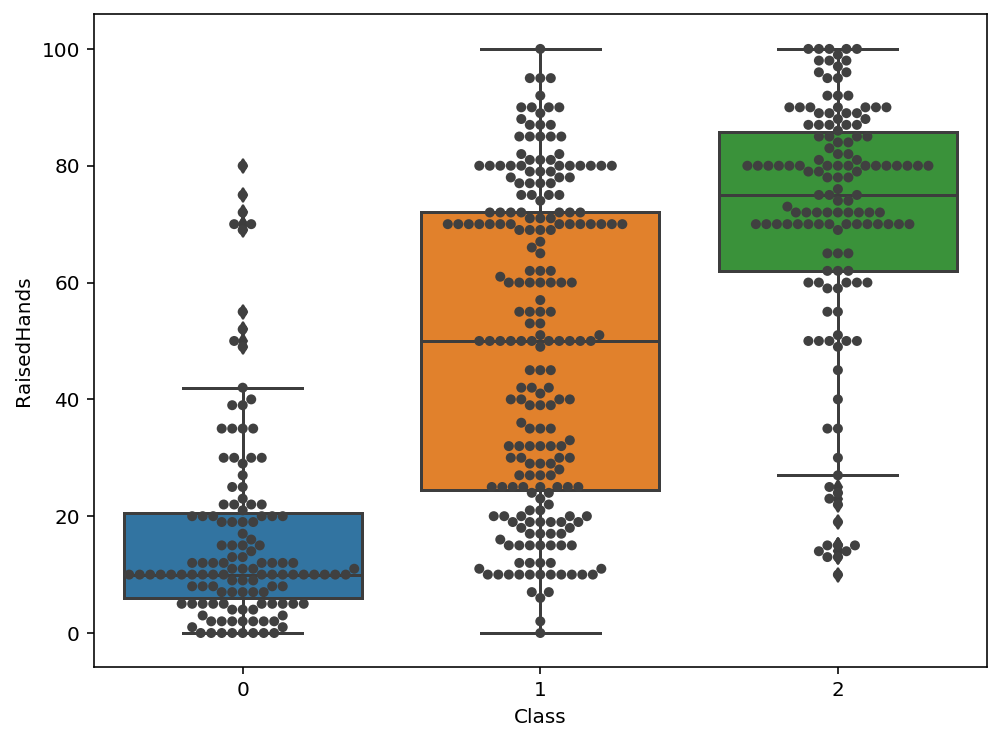

In [262]:
plt.figure(figsize = (8,6))
ax = sns.swarmplot(x='Class', y='RaisedHands', data=df, color='.25')
ax = sns.boxplot(x='Class', y='RaisedHands', data=df)

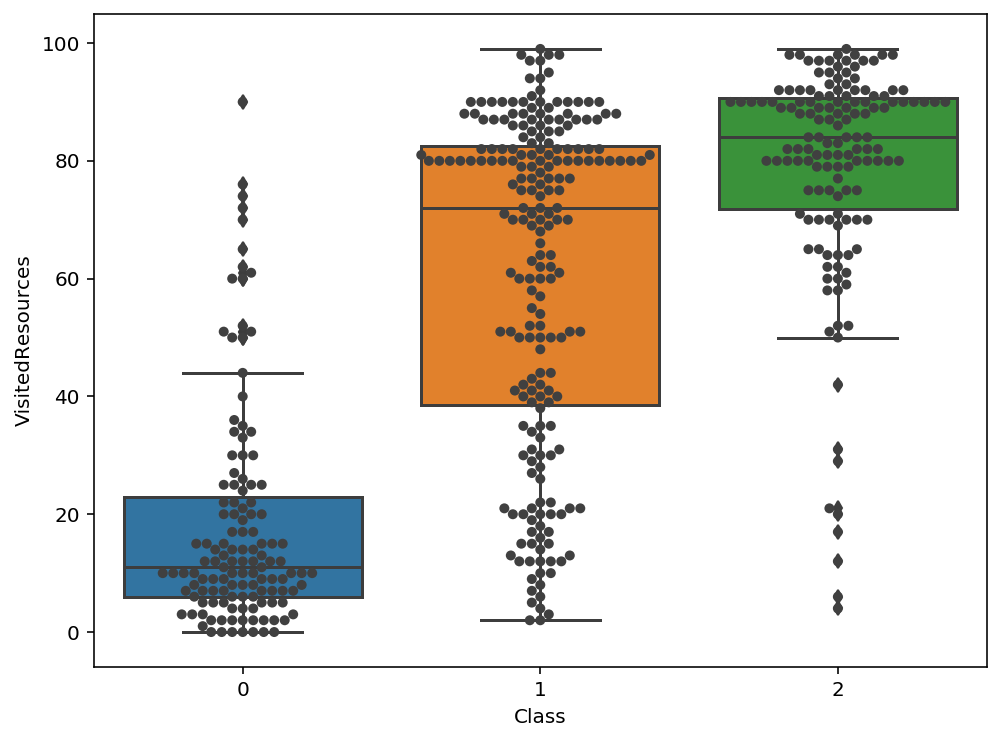

In [263]:
plt.figure(figsize = (8,6))
ax = sns.boxplot(x='Class', y='VisitedResources', data=df)
ax = sns.swarmplot(x='Class', y = 'VisitedResources', data=df, color='.25')

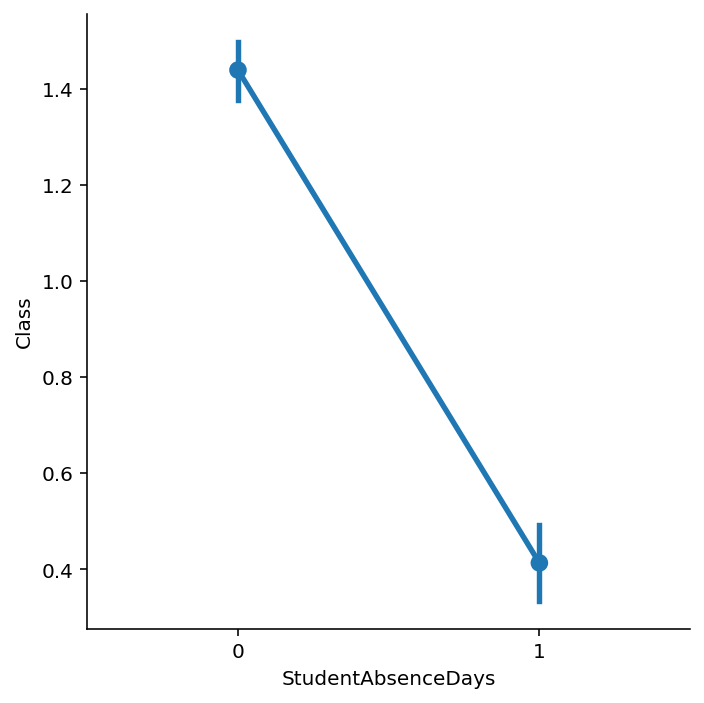

In [264]:
sns.catplot('StudentAbsenceDays','Class', kind='point', data=df)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=.3, random_state=1)

features = X_train[["Gender", "Discussion", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values

test_features = X_test[["Gender", "Discussion", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values

In [266]:


tree_clsfr_ovrfit = tree.DecisionTreeClassifier('entropy')
tree_clsfr_ovrfit = tree_clsfr_ovrfit.fit(features, y_train)

print(tree_clsfr_ovrfit.score(features, y_train))
print(tree_clsfr_ovrfit.score(test_features, y_test))

1.0
0.7013888888888888


In [267]:
tree_clsfr = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_split = 5, random_state = 1)
tree_clsfr = tree_clsfr.fit(features, y_train)

print(tree_clsfr.score(features, y_train))
print(tree_clsfr_ovrfit.score(test_features, y_test))

0.9375
0.7013888888888888


In [268]:
rnd_forest = RandomForestClassifier(criterion='entropy', max_depth = 7, min_samples_split=5, n_estimators = 200, random_state = 4)
rnd_forest = rnd_forest.fit(features, y_train)

print(rnd_forest.score(features, y_train))
print(rnd_forest.score(test_features, y_test))

0.9255952380952381
0.75


In [269]:
print('============= Decision Tree ==============')
print(classification_report(y_test, tree_clsfr.predict(test_features), target_names=['Low', 'Mid', 'High']))

print('============= Random Forest ==============')
print(classification_report(y_test, rnd_forest.predict(test_features), target_names=['Low', 'Mid', 'High']))

============= Decision Tree ==============
              precision    recall  f1-score   support

         Low       0.78      0.88      0.83        33
         Mid       0.61      0.66      0.63        56
        High       0.74      0.62      0.67        55

    accuracy                           0.69       144
   macro avg       0.71      0.72      0.71       144
weighted avg       0.70      0.69      0.69       144

============= Random Forest ==============
              precision    recall  f1-score   support

         Low       0.85      0.85      0.85        33
         Mid       0.66      0.73      0.69        56
        High       0.80      0.71      0.75        55

    accuracy                           0.75       144
   macro avg       0.77      0.76      0.76       144
weighted avg       0.76      0.75      0.75       144



## **Other Classification Methods**

GaussianNB Mean accuracy 0.75 and mean f1_score 0.75 after 50 Iteration

AdaBoostClassifier Mean accuracy 0.76 and mean f1_score 0.77 after 50 Iteration

KNeighborsClassifier Mean accuracy 0.64 and mean f1_score 0.64 after 50 Iteration



[None, None, None, None, None, None]

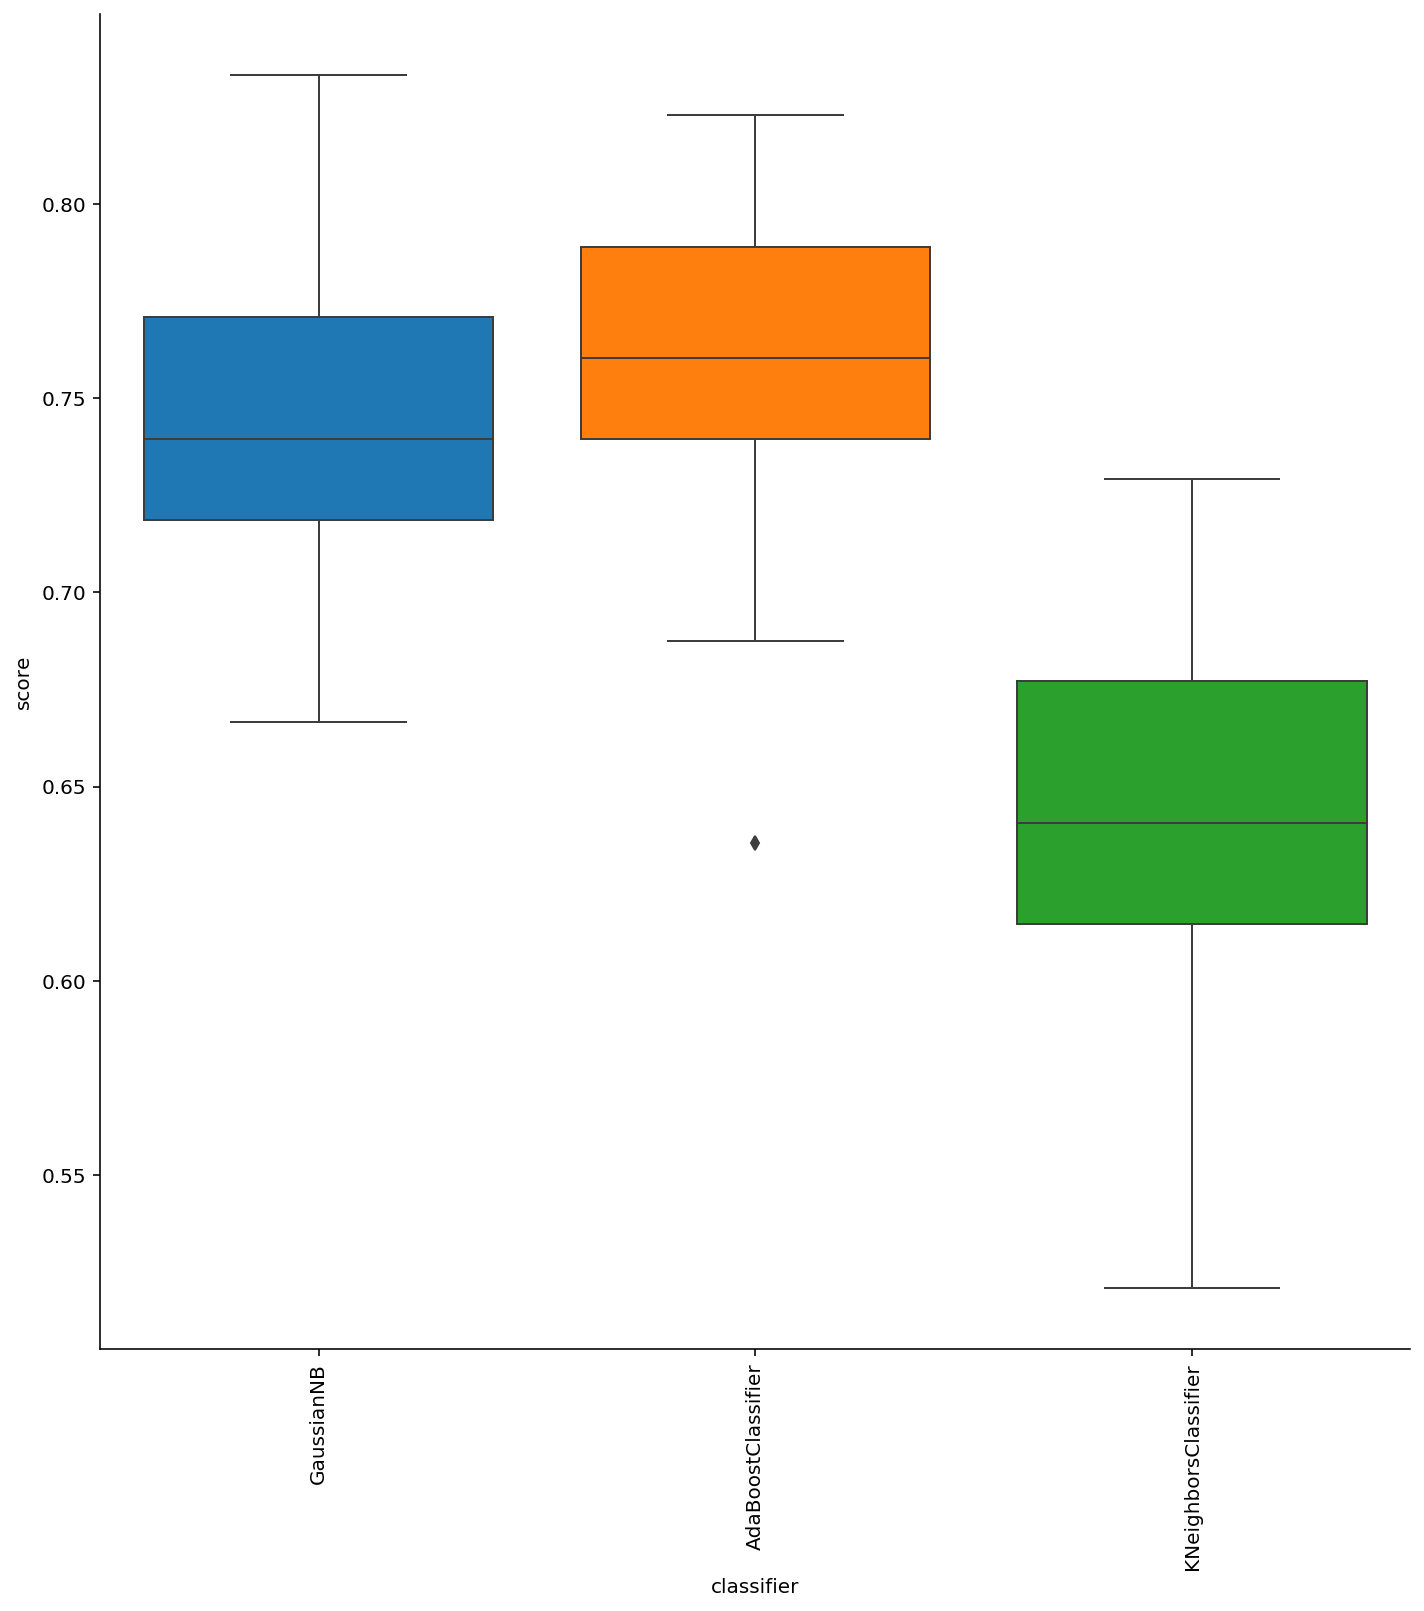

In [279]:

classifiers = [('GaussianNB', GaussianNB()),
               ('AdaBoostClassifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20, min_samples_split=5,random_state=4),n_estimators=300)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1))
              ]
allscores = []
for name, classifier in classifiers:
    accuracy=  0.0
    f1_total = np.array([])
    scores = np.array([])
    iters = 50
    for i in range(iters):
        #test_split
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=.2)

        features = X_train[["Gender", "Discussion", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values

        test_features = X_test[["Gender", "Discussion", "ParentAnsweringSurvey", "ParentschoolSatisfaction", "Relation", "AnnouncementsView", "RaisedHands", "VisitedResources", "StudentAbsenceDays"]].values
        #Calculate the class prior probabilities for each continent
        classifier.fit(features, y_train)
        #Make a prediction for the test data
        y_pred = classifier.predict(test_features)
        #Calculate the accuracy of the data
        scores = np.append(scores, accuracy_score(y_test, y_pred))
        accuracy = accuracy + accuracy_score(y_test, y_pred)
        f1_total = np.append(f1_total, np.average(f1_score(y_test, y_pred, average=None)))
        #print(name,accuracy_score(y_test, y_pred),"\n")

    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)
    accuracy_avg = accuracy / iters
    f1_avg = np.average(f1_total)
    print(name+" Mean accuracy %.2f and mean f1_score %.2f after 50 Iteration\n" % (accuracy_avg, f1_avg))
    
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
#plt.figure(figsize=(15,10))
sns.catplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               height = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [297]:
svm = SVC(kernel='linear',C=1.0)
svm.fit(features, y_train)

y_pred = svm.predict(test_features)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Misclassified samples: 31
Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.65      0.60      0.63        43
           2       0.62      0.74      0.68        31

    accuracy                           0.68        96
   macro avg       0.70      0.69      0.69        96
weighted avg       0.68      0.68      0.68        96



# **Clustering**


In [0]:
%config InlineBackend.figure_format='retina'# Load in the data

pca = PCA()
principalComponents = pca.fit_transform(df_normal.iloc[:,1:])# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Data before clustering

In [0]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')


**Elbow Method** (find optmized number of clusters in kmeans)

In [0]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


**Clustering Algorithms**

In [0]:
# KMEANS
kmeans3 = KMeans(n_clusters=3)
kmeans_model = kmeans3.fit(PCA_components)
y_kmeans3 = kmeans3.fit_predict(PCA_components)

# DBSCAN
db = DBSCAN(eps=1.1, min_samples=10)
db_model = db.fit(PCA_components)
y_db_pred = db.fit_predict(PCA_components)

labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("number of clusters dbscan found are: ",n_clusters)

# HIERARCHICAl
hier = AgglomerativeClustering(n_clusters=3)
hier_model = hier.fit(PCA_components)
y_hier_pred = hier.fit_predict(PCA_components)


**Comparing Clustering Algorithms**

In [0]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)
sc = axes[0][0].scatter(PCA_components[0],PCA_components[1], c = y_kmeans3)
axes[0][0].set_xlabel('kmeans3')

axes[0][1].scatter(PCA_components[0],PCA_components[1], c = y_db_pred)
axes[0][1].set_xlabel('dbscan')

axes[1][0].scatter(PCA_components[0],PCA_components[1], c = y_hier_pred)
axes[1][0].set_xlabel('hierarchical')

axes[1][1].scatter(PCA_components[0],PCA_components[1], c = df["Class"])
axes[1][1].set_xlabel('before_clustering')

plt.show()

Clustering Evaluation


In [0]:
print(metrics.silhouette_score("hierarchical: ",PCA_components, hier_model.labels_))
print(metrics.silhouette_score("kmeans: ",PCA_components, kmeans_model.labels_))
print(metrics.silhouette_score("dbscan: ",PCA_components, db_model.labels_))
